import warnings
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [49]:
PATH = './datasets/Crop_recommendation.csv'
MODELS = './recommender-models/'
data = pd.read_csv(PATH)

## Data Analysis

In [50]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


This dataset consists of **2200** rows in total.

**Each row has 8 columns representing Nitrogen, Phosphorous, Potassium, Temperature, Humidity, PH, Rainfall and Label**

**NPK(Nitrogen, Phosphorous and Potassium)** values represent the NPK values in the soil.
**Temperature**, **humidity** and **rainfall** are the average values of the sorroundings environment respectively.
**PH** is the PH value present in the soil.
**Label** is the value of the type of crop which is suitable to be grown in the above given variable conditions. **Label is the value we will be predicting**


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [52]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

The different types of labels are given below

In [53]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [54]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Seperating features and output labels and creating training and test data 

In [55]:
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']

In [56]:
# Splitting into the training and test dataset

# Train:Test = 4:1

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [57]:
acc = []
models_list = []

### Logistic Regression

In [58]:
LogReg = LogisticRegression(random_state=42).fit(X_train, Y_train)

predicted_values = LogReg.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append("Logistic Regression")

In [59]:
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9454545454545454


In [60]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [61]:
filename = 'LogisticRegresion.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Decision Tree

In [62]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=1000).fit(X_train, Y_train)

predicted_values = DT.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append("Decision Tree")

In [63]:
print("Decision Tree accuracy: ", accuracy)

Decision Tree accuracy:  0.9772727272727273


In [64]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [65]:
filename = 'DecisionTree.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Support Vector Machine SVM

In [66]:
SVM = SVC(gamma='auto').fit(X_train, Y_train)

predicted_values = SVM.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append("Support Vector Machine (SVM)")

In [67]:
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.09090909090909091


In [68]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.00        14
      papaya       0.00    

In [69]:
filename = 'SVM.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Multi-Layer Perceptron

In [70]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 600, 400, 200, 100, 50), random_state=1)

clf.fit(X_train, Y_train)

predicted_values = clf.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

In [71]:
acc.append(accuracy)
models_list.append("Multi-Layer Perceptron")

In [72]:
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.9522727272727273


In [73]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.89      1.00      0.94        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.81      0.92      0.86        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [74]:
filename = 'MLP.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Random Forest

In [75]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append('Random Forest')

In [76]:
print("RF's Accuracy is: ", accuracy)

RF's Accuracy is:  0.9931818181818182


In [77]:
print(metrics.classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [78]:
filename = 'RF.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

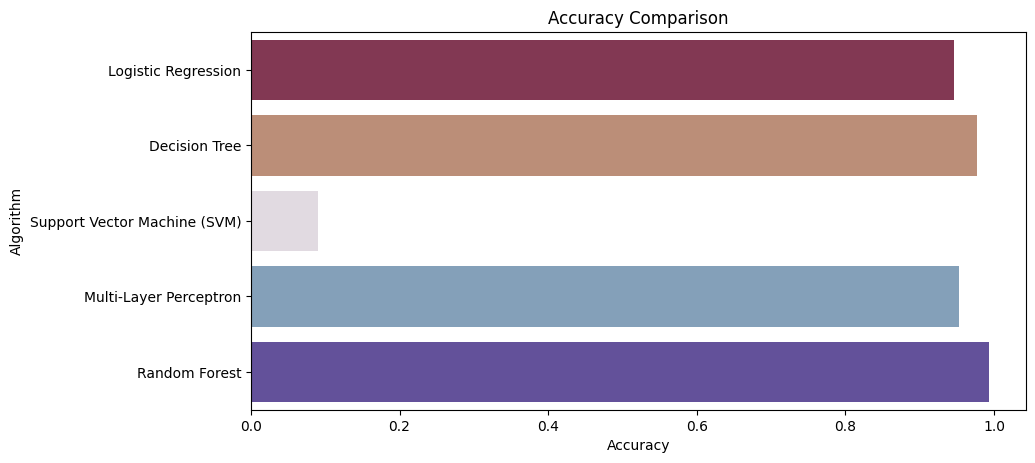

In [79]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models_list,palette='twilight_shifted_r')

In [80]:
accuracy_models = dict(zip(models_list, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9454545454545454
Decision Tree --> 0.9772727272727273
Support Vector Machine (SVM) --> 0.09090909090909091
Multi-Layer Perceptron --> 0.9522727272727273
Random Forest --> 0.9931818181818182
